<a href="https://colab.research.google.com/github/GASANAMDavid/AIPND-revision/blob/master/My_human_or_Horse_Classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Downloading Horse and Human dataset**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-02-07 10:10:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 209.85.147.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   164MB/s    in 0.9s    

2021-02-07 10:10:01 (164 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



## **Extracting files from the zip file**

In [ ]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

## **Defining each sub-directory**
These images in our dataset are not explicitly labelled as we previously saw in the handwritting dataset, all data were labelled from 0-9. 
Were are going to use an **ImageGenerator** which will label our images appropriately.

But firstly let import our dataset from the tmp/horse-or-human into individual classes of strings **train_horse_dir** and **train_human_dir**

In [ ]:
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

Now, let print the first 10 elements of each sub-directory (humans and horses).

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse46-7.png', 'horse05-3.png', 'horse16-3.png', 'horse45-4.png', 'horse24-5.png', 'horse48-4.png', 'horse09-5.png', 'horse12-0.png', 'horse31-6.png', 'horse46-6.png']
['human09-20.png', 'human08-06.png', 'human01-19.png', 'human04-21.png', 'human07-03.png', 'human12-10.png', 'human01-08.png', 'human08-18.png', 'human15-17.png', 'human06-10.png']


let's find out the total number of horses and humans images in the directories

In [ ]:
print(f'total training horse images: {len(train_horse_names)}')
print(f'total training human images: {len(train_human_names)}')

total training horse images: 500
total training human images: 527


Now let's look at a few pictures to get a better sense of how they look alike using matplotlib

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# parameters for our graph; will a 4x4 settings
nrows = 4
ncols = 4

# index for iterating over images
pic_index = 0

Now, display a batch of 8 bhorses and 8 humans

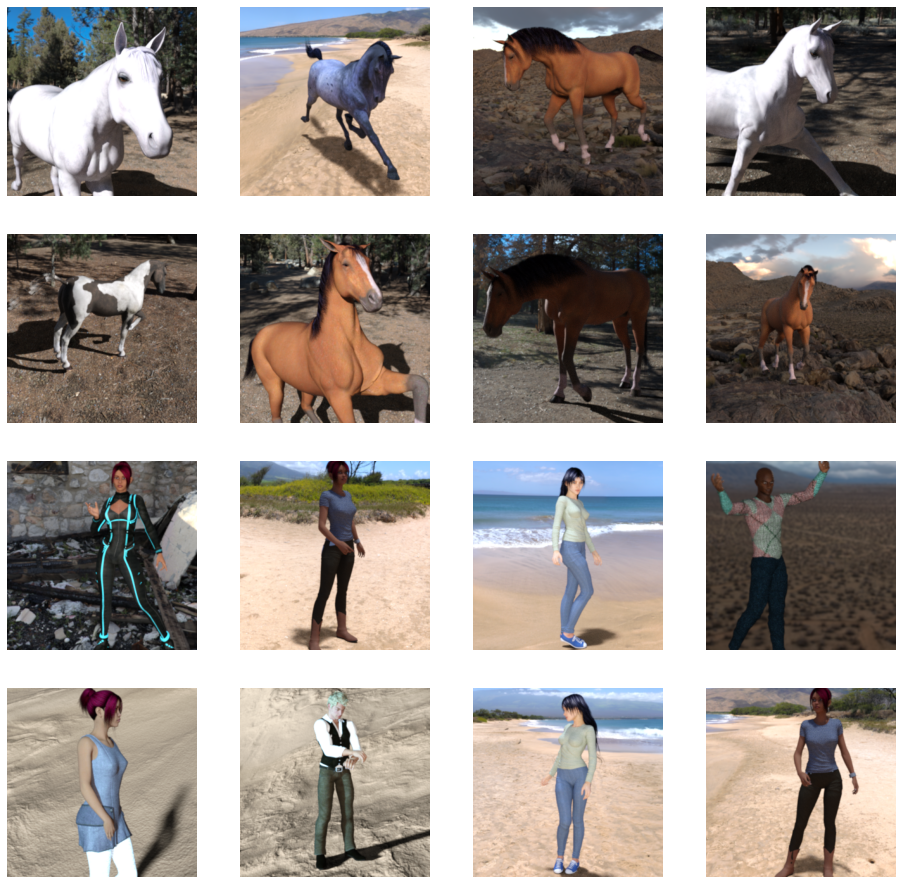

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fnames)
                  for fnames in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  subp = plt.subplot(nrows, ncols, i+1)
  subp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()
# print(type(train_horse_dir))

# **Building a Small Model from Scratch**

Step 1 will be importing TensorFlow

In [ ]:
import tensorflow as tf

We then add convolution layers, Flatten the result and finally feed the flatten result into the Dense layers using 
***tf.keras.models.Sequential([...])***

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

On the last Dense layer we used sigmoid activation function which is suitable for binary classification. It encodes the probability that the current image is of class 1 (as opposed to class 0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

Now we are going compile our model using ***binary_crossentropy*** as loss function and ***RMSprop*** as an optimizer which is prefarable to sgd because it automates learning-rate tuning for us.

Other optimizers such as **Adam** and **Adagrad** may well be used.

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

# **Data Pre-processing**
In this step were are going to read our images to there corressponding tensors using ImageDataGenerator
Rescale all image tensors in pixel range[0,1] there are normall in range[0,255]

Our generator will yield batches of image sizes (300,300) and their labels(binary)

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Rescaling the image tensors to range [0,1]
train_data_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_data_gen.flow_from_directory('/tmp/horse-or-human',
                                                     target_size = (300,300),
                                                     batch_size=128,
                                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


# **Training**
Now we train our model using a generator as input and label for 15 epochs

Loss and Accuracy indicates progress of training

In [ ]:
model.fit_generator(train_generator, epochs=15, steps_per_epoch=8, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 79s 9s/step - loss: 0.9363 - accuracy: 0.4475
Epoch 2/15
8/8 [==============================] - 77s 9s/step - loss: 0.6954 - accuracy: 0.5332
Epoch 3/15
8/8 [==============================] - 86s 11s/step - loss: 0.5296 - accuracy: 0.7250
Epoch 4/15
8/8 [==============================] - 77s 9s/step - loss: 0.4408 - accuracy: 0.8416
Epoch 5/15
8/8 [==============================] - 76s 9s/step - loss: 0.5177 - accuracy: 0.8350
Epoch 6/15
8/8 [==============================] - 77s 9s/step - loss: 0.2064 - accuracy: 0.9357
Epoch 7/15
8/8 [==============================] - 77s 9s/step - loss: 0.1792 - accuracy: 0.9352
Epoch 8/15
8/8 [==============================] - 76s 9s/step - loss: 0.1396 - accuracy: 0.9445
Epoch 9/15
8/8 [==============================] - 76s 9s/step - loss: 0.0787 - accuracy: 0.9665
Epoch 10/15
8/8 [==============================] - 76s 9s/step - loss: 0.1820 - accuracy: 0.9513
Epoch 11/15
8/8 [=====================

# **Running the model**
Using the Model for future images to predict wheather **horse** or **human** to a set of uploaded images

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing.image import img_to_array,load_img

uploaded = files.upload()
for fn in uploaded.keys():
  path = os.path.join('/content/', fn)
  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x=np.expand_dims(x, axis=0)
  x=x/255
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + 'is a human')
  else:
    print(fn + ' is a horse')


Saving images (4).jfif to images (4).jfif
[9.037027e-19]
images (4).jfif is a horse


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)